# Computes the baseline for each trial in the dataset

In [1]:
from wfield import *

localdisk='/mnt/dual/temp_folder/CSP23_20200226/'
# load dat
dat_path = glob(pjoin(localdisk,'*.dat'))[0]
dat = mmap_dat(dat_path)
# load trial onsets
trial_onsets = np.load(pjoin(localdisk,'trial_onsets.npy')).astype(int)
# trial onsets has is a Nx3 array. 
# The columns are: trial number, onset of the trial (frame index), offset of the trial   

nbaseline_frames = 30 # use 30 frames to compute the baseline

frames_average_trials = frames_average_for_trials(dat,
                                           trial_onsets[:,1],
                                           nbaseline_frames)
# Compute the average of all trials and save it
np.save(pjoin(localdisk,'frames_average.npy'),frames_average_trials.mean(axis=0))

## Visualize the averages on the notebook

In [ ]:
im = hv_imshow_stack(frames_average_trials,timelabel='Trial index')
im

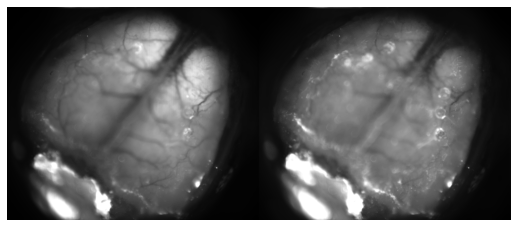

In [6]:
%matplotlib inline 
#imshow_noborder(two_chan_to_rgb(frames_average_trials.mean(axis=0)));
imshow_noborder(np.concatenate(frames_average_trials.mean(axis=0),axis = 1),
                cmap='gray');